# Groceries Data Analysis

## Content
<p>1. Introduction</p>
<p>2. Objective</p>
<p>3. Getting to Know Data & Variables</p>
<p>4. Data Preparation</p>
<p>5. Data Analysis</p>
<p>6. Modelling & Assessment</p>
<p>7. Conclusion</p>
<p>8. Reference</p>

## 1. Introduction
<p>A grocery store sells various products to fulfill different customers' demands. When Sales and Planning teams make orders for the store, it is important for them to know the best selling products, corresponding volume and purchase time to make balance between keeping safety stock of products and minimising operation cost.</p>

## 2. Objective
<p>To find out the best selling products and corresponding purchase patterns for stock level planning.</p>

## 3. Getting to Know Data & Variables

### 3.1 Data Import
<p>Data in csv format is imported.</p>

In [1]:
#Import packages
import pandas as pd
import numpy as np

#Import Data
df = pd.read_csv ("Groceries_dataset.csv")

### 3.2 Data Preview

In [2]:
#Data preview
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<br></br>
<p>From the preview, columns needed to be renamed and looks tidier.</p>
<br></br>

In [3]:
#Tidy up of columns' names
df.rename(columns = {"Member_number":"Member_Number","itemDescription":"Item_Description"}, inplace = True)

#Statistics Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Member_Number     38765 non-null  int64 
 1   Date              38765 non-null  object
 2   Item_Description  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


<br></br>
<p>There are 38,765 records with 3 variables. Below table shows summary of the variales' description and data type.</p>
<br></br>

|   **Variable**   |                           **Description**                    |  **Data Type** |
|:-----------------:|:--------------------------------------------------------------|:----------------|
|Member_Number      |ID No. of customers.                                           |Nominal Number   |
|Date               |2014-2015 purchase date.                                       |Character        | 
|Item_Description   |Purchase item.                                                 |Character        | 

<br></br>
<p>There are 2 variables for character and 1 variables for number.</p>
<br></br>

## 4. Data Preparation
### 4.1 Missing Values Detection

In [4]:
#View statistical summary
df.isnull().sum()

Member_Number       0
Date                0
Item_Description    0
dtype: int64

<br></br>
<p>No missing values are found as no NA values are displayed from statistical summary.</p>
<br></br>

### 4.2 Date Type Conversion
<p>To prepare for time series data analysis, change data type of Date from character to date and format to yyyy-mm-dd.</p>

In [5]:
#Date type conversion of Date
df["Date"] = pd.to_datetime(df["Date"])

#View of data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Member_Number     38765 non-null  int64         
 1   Date              38765 non-null  datetime64[ns]
 2   Item_Description  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


,Member_Number,Date,Item_Description
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


## 5. Data Analysis
### 5.1 Top 10 Best Selling Products

In [6]:
#Add month and weekday of purchase date
df["Month"] = pd.to_datetime(df["Date"], format="%m").dt.month_name().str.slice(stop=3)
df["Weekday"] = pd.to_datetime(df["Date"], format="%a").dt.day_name().str.slice(stop=3)
df.head()

,Member_Number,Date,Item_Description,Month,Weekday
0,1808,2015-07-21,tropical fruit,Jul,Tue
1,2552,2015-05-01,whole milk,May,Fri
2,2300,2015-09-19,pip fruit,Sep,Sat
3,1187,2015-12-12,other vegetables,Dec,Sat
4,3037,2015-01-02,whole milk,Jan,Fri


<br></br>
<p>To get more information of purchase pattern, variable of "Month" and "Weekday" are added.</p>
<br></br>

<AxesSubplot:title={'center':'Bar Chart of 2014-2015 Top 10 Best Selling Products'}, xlabel='Products', ylabel='Count'>

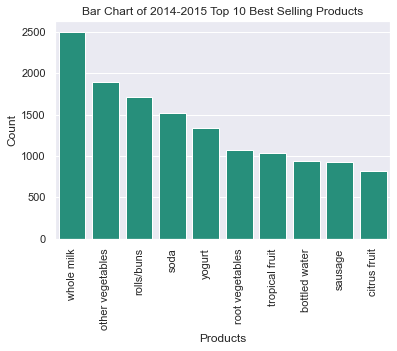

In [15]:
#Creation of frequency table
ft1 = pd.crosstab(index = df["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Installation of packages
import seaborn as sns
import matplotlib.pyplot as plt

#Bar chart of 2014-2015 top 10 best selling products
sns.set(style = "darkgrid")
p1 = sns.barplot(x = "Item_Description", y = "Count", data = ft1, color = "#16A085")
plt.title("Bar Chart of 2014-2015 Top 10 Best Selling Products")
plt.xlabel("Products")
plt.xticks(rotation = 90)
p1           

<br></br>
<p>From the bar chart, it shows that top 10 best selling products in 2014 to 2015. The most popular product is whole milk, second is other vegetabables and third is rolls/buns. So, they should have higher stock level to fulfill customers' demands and prevent out-of-stock.</p>
<p>Besides, more than half of top 10 products are perishable food that are needed to be stored and transported under climate-controlled condition. As the operation cost with climate-controlled condition is higher than normal conditiona, the stock level should be considered carefully.</p>
<br></br>

In [19]:
#Creation of top 10 table on Jan
ft2 = df[df["Month"] == "Jan"]
ft2 = pd.crosstab(index = ft2["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Feb
ft3 = df[df["Month"] == "Feb"]
ft3 = pd.crosstab(index = ft3["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Mar
ft4 = df[df["Month"] == "Mar"]
ft4 = pd.crosstab(index = ft4["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Apr
ft5 = df[df["Month"] == "Apr"]
ft5 = pd.crosstab(index = ft5["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on May
ft6 = df[df["Month"] == "May"]
ft6 = pd.crosstab(index = ft6["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Jun
ft7 = df[df["Month"] == "Jun"]
ft7 = pd.crosstab(index = ft7["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Jul
ft8 = df[df["Month"] == "Jul"]
ft8 = pd.crosstab(index = ft8["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Aug
ft9 = df[df["Month"] == "Aug"]
ft9 = pd.crosstab(index = ft9["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Sep
ft10 = df[df["Month"] == "Sep"]
ft10 = pd.crosstab(index = ft10["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Oct
ft11 = df[df["Month"] == "Oct"]
ft11 = pd.crosstab(index = ft11["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Nov
ft12 = df[df["Month"] == "Nov"]
ft12 = pd.crosstab(index = ft12["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

#Creation of top 10 table on Dec
ft13 = df[df["Month"] == "Dec"]
ft13 = pd.crosstab(index = ft13["Item_Description"], columns = "Count").sort_values("Count", ascending = False).Count[0:10].rename_axis("Item_Description").reset_index()

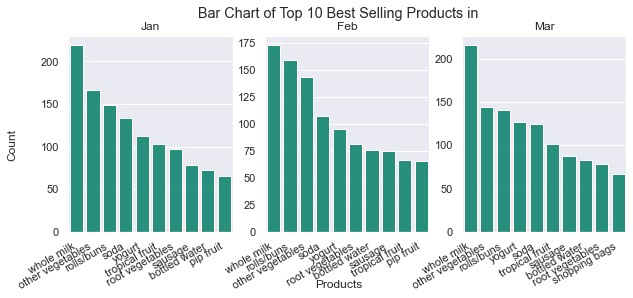

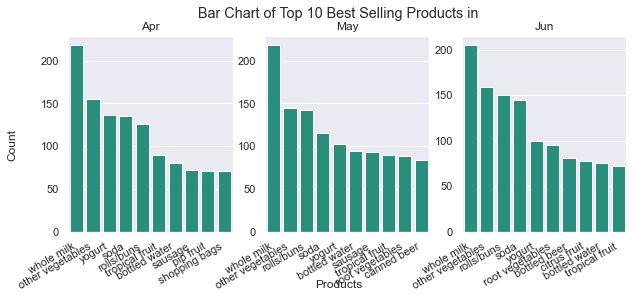

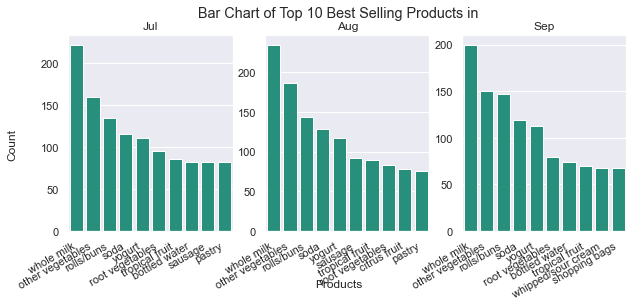

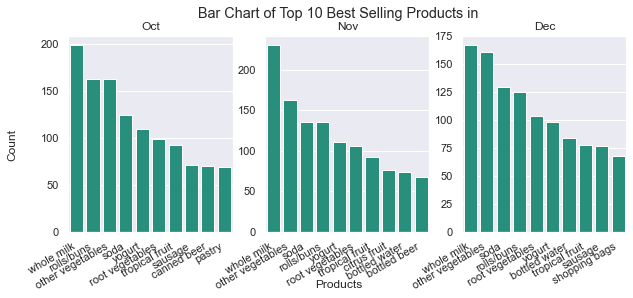

In [20]:
#Mulitple plots on the same page
fig, axes = plt.subplots(1, 3, figsize = (10, 4))
fig.suptitle("Bar Chart of Top 10 Best Selling Products in", ha = "center")
fig.text(0.5, 0.005, "Products", ha = "center")
fig.text(0.04, 0.5, "Count", va = "center", rotation = "vertical")

sns.set(style = "darkgrid")
p2 = sns.barplot(x = "Item_Description", y = "Count", data = ft2, color = "#16A085", ax = axes[0]).set(title = "Jan", xlabel = None, ylabel = None)
p3 = sns.barplot(x = "Item_Description", y = "Count", data = ft3, color = "#16A085", ax = axes[1]).set(title = "Feb", xlabel = None, ylabel = None)
p4 = sns.barplot(x = "Item_Description", y = "Count", data = ft4, color = "#16A085", ax = axes[2]).set(title = "Mar", xlabel = None, ylabel = None)
fig.autofmt_xdate()

#Mulitple plots on the same page
fig, axes = plt.subplots(1, 3, figsize = (10, 4))
fig.suptitle("Bar Chart of Top 10 Best Selling Products in", ha = "center")
fig.text(0.5, 0.005, "Products", ha = "center")
fig.text(0.04, 0.5, "Count", va = "center", rotation = "vertical")
fig.autofmt_xdate()

sns.set(style = "darkgrid")
p5 = sns.barplot(x = "Item_Description", y = "Count", data = ft5, color = "#16A085", ax = axes[0]).set(title = "Apr", xlabel = None, ylabel = None)
p6 = sns.barplot(x = "Item_Description", y = "Count", data = ft6, color = "#16A085", ax = axes[1]).set(title = "May", xlabel = None, ylabel = None)
p7 = sns.barplot(x = "Item_Description", y = "Count", data = ft7, color = "#16A085", ax = axes[2]).set(title = "Jun", xlabel = None, ylabel = None)

#Mulitple plots on the same page
fig, axes = plt.subplots(1, 3, figsize = (10, 4))
fig.suptitle("Bar Chart of Top 10 Best Selling Products in", ha = "center")
fig.text(0.5, 0.005, "Products", ha = "center")
fig.text(0.04, 0.5, "Count", va = "center", rotation = "vertical")
fig.autofmt_xdate()

sns.set(style = "darkgrid")
p8 = sns.barplot(x = "Item_Description", y = "Count", data = ft8, color = "#16A085", ax = axes[0]).set(title = "Jul", xlabel = None, ylabel = None)
p9 = sns.barplot(x = "Item_Description", y = "Count", data = ft9, color = "#16A085", ax = axes[1]).set(title = "Aug", xlabel = None, ylabel = None)
p10 = sns.barplot(x = "Item_Description", y = "Count", data = ft10, color = "#16A085", ax = axes[2]).set(title = "Sep", xlabel = None, ylabel = None)

#Mulitple plots on the same page
fig, axes = plt.subplots(1, 3, figsize = (10, 4))
fig.suptitle("Bar Chart of Top 10 Best Selling Products in", ha = "center")
fig.text(0.5, 0.005, "Products", ha = "center")
fig.text(0.04, 0.5, "Count", va = "center", rotation = "vertical")
fig.autofmt_xdate()

sns.set(style = "darkgrid")
p11 = sns.barplot(x = "Item_Description", y = "Count", data = ft11, color = "#16A085", ax = axes[0]).set(title = "Oct", xlabel = None, ylabel = None)
p12 = sns.barplot(x = "Item_Description", y = "Count", data = ft12, color = "#16A085", ax = axes[1]).set(title = "Nov", xlabel = None, ylabel = None)
p13 = sns.barplot(x = "Item_Description", y = "Count", data = ft13, color = "#16A085", ax = axes[2]).set(title = "Dec", xlabel = None, ylabel = None)

<br></br>
<p>Products are sorted into 12 groups, from Jan to Dec, to show the purchase pattern by months. Whole milk, other vegetables and rolls/buns are top 3 in most of the months.</p>
<br></br>

## 6. Modelling & Assessment
### 6.1 Objective
<p>To forecast the total stock level and find the association among products.</p>

### 6.2 Analysis

#### 6.2.1 Time Series 

<function matplotlib.pyplot.show(close=None, block=None)>

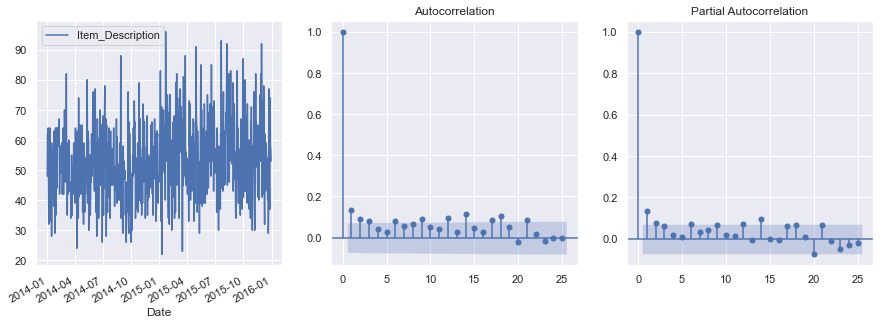

In [21]:
#Install packages
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Creation of frequency table
ft14 = df.groupby("Date",as_index=False).count()
ft14 = ft14[["Date","Item_Description"]].set_index("Date")

#Time Series and ACF 
fig, axes = plt.subplots(1,3, figsize = (15, 5))
ft14.plot(ax=axes[0])
plot_acf(ft14,lags=25, ax=axes[1])
plot_pacf(ft14,lags=25, ax=axes[2])
plt.show

<br></br>
<p>From the time series plot, data is stationary. Both ACF plot and PACF plot suggest strong correlation at lag 1. It will be input into different models for optimisation, AR(1), MA(1) and ARMA (1,1).</p>
<br></br>

In [23]:
#Import package
from statsmodels.tsa.arima_model import ARIMA

#AR(1)
m1 = ARIMA(ft14, order=(1,0,0))
m1_fit = m1.fit()
print(m1_fit.summary())

#MA(1)
m2 = ARIMA(ft14, order=(0,0,1))
m2_fit = m2.fit()
print(m2_fit.summary())

#ARMA(1,1)
m3 = ARIMA(ft14, order=(1,0,1))
m3_fit = m3.fit()
print(m3_fit.summary())

C:\Users\cally\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cally\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                              ARMA Model Results                              
Dep. Variable:       Item_Description   No. Observations:                  728
Model:                     ARMA(1, 0)   Log Likelihood               -2888.307
Method:                       css-mle   S.D. of innovations             12.788
Date:                Fri, 01 Oct 2021   AIC                           5782.614
Time:                        11:06:17   BIC                           5796.385
Sample:                             0   HQIC                          5787.928
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     53.2475      0.546     97.462      0.000      52.177      54.318
ar.L1.Item_Description     0.1327      0.037      3.614      0.000       0.061       0.205
    

<br></br>
<p>By trial and error, ARMA(2,2) is selected as it has the smallest AIC value.</p>
<br></br>

C:\Users\cally\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cally\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

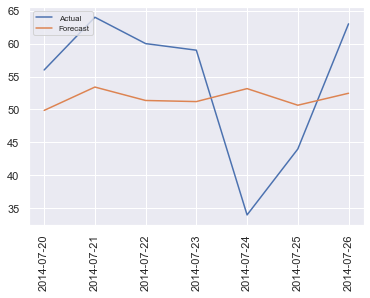

In [24]:
#Finalised model for forecast
m4 = ARIMA(ft14[0:199], order=(2,1,3))
m4_fit = m4.fit()
tfore, se, conf = m4_fit.forecast(7, alpha=0.05)
tfore = pd.Series(tfore, index = ft14[200:207].index)

#Time series plot for comparison between actual & forecast 
plt.plot(ft14[200:207], label = "Actual")
plt.plot(tfore[0:7], label = "Forecast")
plt.legend(loc = 'upper left', fontsize = 8)
plt.xticks(rotation = 90)
plt.show()

<br></br>
<p>After day 1, the difference between acutal and forecast figures vary.</p>
<br></br>

#### 6.2.2 Association Rule

In [51]:
#Import packages
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#Products grouped by same customer on same date
ft15 = df.groupby(["Member_Number","Date"])["Item_Description"].apply(",".join).reset_index()
ft15.head()

#Split items into separate strings in each row
for i in range(len(ft15.Item_Description)):
    ft15.Item_Description[i] = ft15.Item_Description[i].split(",")

#Transform dataframe to transaction 
ft16 = ft15.Item_Description
te = TransactionEncoder()
te_ary = te.fit(ft16).transform(ft16)

#From array to dataframe
ft17 = pd.DataFrame(te_ary, columns = te.columns_)

#Get frequent items list
mba1 = apriori(ft17, min_support = 0.001, use_colnames = True) 

#Assoication rules
mba2 = association_rules(mba1, metric = "confidence", min_threshold = 0.1).sort_values(by = "confidence", ascending = False)
mba2.head(10)

<ipython-input-51-31a9638478e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft15.Item_Description[i] = ft15.Item_Description[i].split(",")


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
120,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
126,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
99,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
123,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
129,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
30,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814
46,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
37,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743


<br></br>
<p>From the result, top 10 association rules are listed and ploted above.</p>
<br></br>

## 7. Conclusion
<p>In conclusion, the best selling product is whole milk. Top 3 best selling products are whole milk, other vegetables and rolls/buns in most of the months. For stock planning, the frequency of order time, units and types can be predicted by time series and association rules analysis.</p>

## 8. Reference
### (1) Kaggle, Groceries dataset
<p>Heeral Dedhia (2020). Groceries dataset.</p>
<p>https://www.kaggle.com/heeraldedhia/groceries-dataset</p>